In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
f_birth = pd.read_csv("daily-total-female-births.csv", index_col = [0], parse_dates = [0])

In [10]:
f_birth.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [11]:
series_value = f_birth.values

In [13]:
type(series_value)

numpy.ndarray

In [14]:
f_birth.size

365

In [16]:
f_birth.tail()

,Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [17]:
f_birth.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


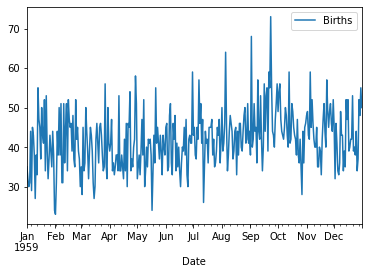

In [18]:
f_birth.plot()

In [23]:
f_birth_mean = f_birth.rolling(window = 30).mean()

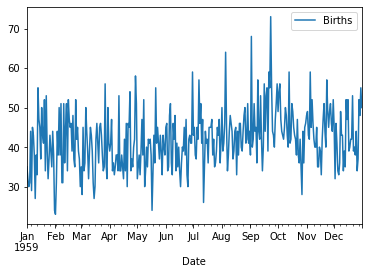

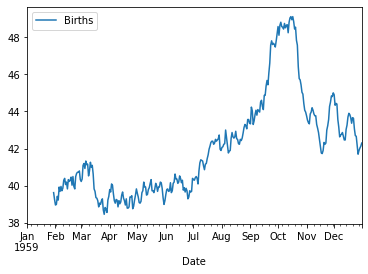

In [24]:
f_birth.plot()
f_birth_mean.plot()

# Baseline model 

In [25]:
value = pd.DataFrame(series_value)

In [26]:
birth_df = pd.concat([value, value.shift(1)], axis = 1)

In [27]:
birth_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [28]:
birth_df.columns = ['Actual_birth','Forecast_birth']

In [29]:
birth_df.head()

,Actual_birth,Forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [32]:
birth_test = birth_df[1:]

In [33]:
birth_test.head()

,Actual_birth,Forecast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [35]:
birth_error = mean_squared_error(birth_test.Actual_birth, birth_test.Forecast_birth)

In [36]:
birth_error

84.22252747252747

In [37]:
np.sqrt(birth_error)

9.177283229394606

### Error of +- 9 births everyday

# ARIMA - Autoregressive (p) Integrated (d) Moving Average (q)

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

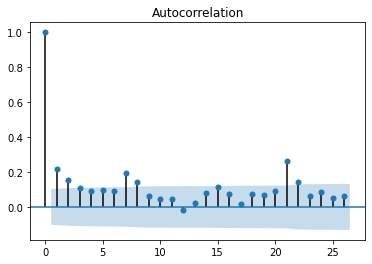

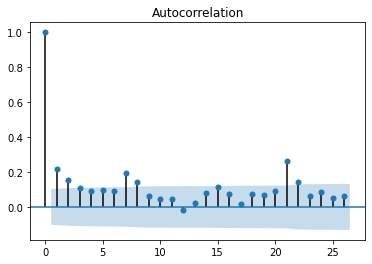

In [39]:
# plot_acf is to identiy parameter Q
#plot_pacf is to identify parameter P
# ARIMA(p,d,q) 

plot_acf(f_birth)

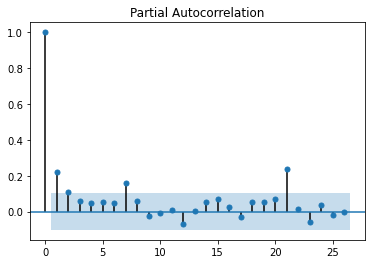

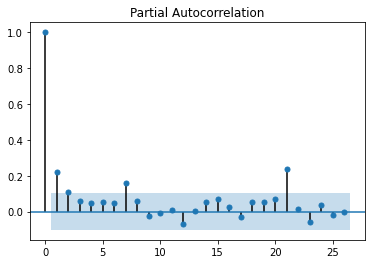

In [40]:
plot_pacf(f_birth)

In [41]:
# p = 2,3   d = 0  & q =3,4

f_birth.size

365

In [42]:
birth_train = f_birth[0:330]
birth_test = f_birth[330:365]

In [43]:
birth_train.size

330

In [44]:
birth_test.size

35

In [45]:
from statsmodels.tsa.arima_model import ARIMA

In [47]:
birth_model = ARIMA(birth_train, order=(2,1,3))

In [48]:
birth_model_fit = birth_model.fit()

In [49]:
birth_model_fit.aic

2230.9482604585983

In [51]:
birth_forecast = birth_model_fit.forecast(steps=35)[0]

In [52]:
birth_forecast

array([45.30360153, 46.31040277, 43.64930979, 44.59210728, 46.49684039,
       44.34328708, 44.08974525, 46.34370095, 45.07512458, 43.88093736,
       45.95196363, 45.69552213, 43.97382624, 45.45657266, 46.10351848,
       44.31115525, 44.99217293, 46.25993602, 44.79323507, 44.66457302,
       46.18548588, 45.30612279, 44.53304751, 45.94647122, 45.74816924,
       44.60544443, 45.63317412, 46.04956803, 44.84501974, 45.33672407,
       46.18191255, 45.18560944, 45.12961024, 46.15738371, 45.55053998])

In [53]:
birth_test

,Births
Date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [56]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

6.859905492397431

### Reduced the error by 3. The mean squared error is very low which means the model is very good